In [384]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [385]:
df_nba = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NBA_data.csv')

In [386]:
df_nba.head(10)

,Player,Position,Age,Games,Minutes_Played,True_Shooting,Threepoint_Attempt_rate,Free_throw_attempt_rate,Player_Efficiency_Rating
0,Precious Achiuwa,PF,21,28,408.0,0.599,0.000,0.541,15.1
1,Jaylen Adams,PG,24,6,17.0,0.125,0.250,0.000,-6.9
2,Steven Adams,C,27,27,760.0,0.592,NaN,0.397,15.9
3,Bam Adebayo,C,23,26,873.0,0.641,0.015,0.469,22.7
4,LaMarcus Aldridge,C,35,18,480.0,0.542,0.298,0.093,15.2
5,Ty-Shon Alexander,SG,22,3,8.0,0.000,0.333,0.000,-11.9
6,Nickeil Alexander-Walker,SG,22,23,441.0,0.502,0.463,0.170,12.0
7,Grayson Allen,SG,25,19,454.0,0.630,0.721,0.264,14.0
8,Jarrett Allen,C,22,28,734.0,0.695,0.021,0.695,22.5
9,Jarrett Allen,C,22,12,320.0,0.730,0.000,0.938,21.3


In [387]:
df_nba.tail()

,Player,Position,Age,Games,Minutes_Played,True_Shooting,Threepoint_Attempt_rate,Free_throw_attempt_rate,Player_Efficiency_Rating
492,Delon Wright,SG,28,28,823.0,0.559,0.298,0.346,16.6
493,Thaddeus Young,PF,32,23,592.0,0.597,0.104,0.169,18.5
494,Trae Young,PG,22,26,901.0,0.598,0.349,0.577,22.9
495,Cody Zeller,C,28,15,361.0,0.569,0.133,0.242,18.2
496,Ivica Zubac,C,23,30,586.0,0.722,0.007,0.500,20.5


In [388]:
df_nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497 entries, 0 to 496
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Player                    497 non-null    object 
 1   Position                  497 non-null    object 
 2   Age                       497 non-null    int64  
 3   Games                     497 non-null    int64  
 4   Minutes_Played            495 non-null    float64
 5   True_Shooting             494 non-null    float64
 6   Threepoint_Attempt_rate   495 non-null    float64
 7   Free_throw_attempt_rate   495 non-null    float64
 8   Player_Efficiency_Rating  497 non-null    float64
dtypes: float64(5), int64(2), object(2)
memory usage: 35.1+ KB


In [389]:
df_nba.describe()

,Age,Games,Minutes_Played,True_Shooting,Threepoint_Attempt_rate,Free_throw_attempt_rate,Player_Efficiency_Rating
count,497.000000,497.000000,495.000000,494.000000,495.000000,495.000000,497.000000
mean,25.623742,18.456740,416.492929,0.538939,0.406362,0.274804,12.646278
std,4.054229,8.311394,297.543620,0.130360,0.234207,0.270650,7.404316
min,19.000000,1.000000,2.000000,0.000000,0.000000,0.000000,-40.900000
25%,22.000000,12.000000,127.000000,0.500000,0.255000,0.142000,9.300000
50%,25.000000,20.000000,417.000000,0.556000,0.418000,0.227000,12.600000
75%,28.000000,26.000000,665.500000,0.607000,0.566000,0.318000,16.700000
max,37.000000,30.000000,1101.000000,1.500000,1.000000,2.667000,38.700000


In [390]:
df_nba.isnull().sum()

Player                      0
Position                    0
Age                         0
Games                       0
Minutes_Played              2
True_Shooting               3
Threepoint_Attempt_rate     2
Free_throw_attempt_rate     2
Player_Efficiency_Rating    0
dtype: int64

In [391]:
df_nba['Minutes_Played'].fillna(df_nba.Minutes_Played.mean(),inplace=True)

In [392]:
df_nba['True_Shooting'].fillna(df_nba.True_Shooting.mean(),inplace=True)

In [393]:
df_nba['Threepoint_Attempt_rate'].fillna(df_nba.Threepoint_Attempt_rate.mean(),inplace=True)

In [394]:
df_nba['Free_throw_attempt_rate'].fillna(df_nba.Free_throw_attempt_rate.mean(),inplace=True)

In [395]:
df_nba.isnull().sum()

Player                      0
Position                    0
Age                         0
Games                       0
Minutes_Played              0
True_Shooting               0
Threepoint_Attempt_rate     0
Free_throw_attempt_rate     0
Player_Efficiency_Rating    0
dtype: int64

In [396]:
df_nba.Position.value_counts()

SG       122
PF       102
PG        92
C         89
SF        84
G          4
F          2
SF-PF      1
F-C        1
Name: Position, dtype: int64

In [397]:
df_nba.replace({'SG','PF','PG','C','SF','G','F','SF-PF','F-C'},{0,1,2,3,4,5,6,7,8},inplace = True)

In [398]:
from sklearn.model_selection import train_test_split


In [399]:
X = df_nba.iloc[:,1:8]
Y = df_nba.iloc[:,-1]

In [400]:
X

,Position,Age,Games,Minutes_Played,True_Shooting,Threepoint_Attempt_rate,Free_throw_attempt_rate
0,6,21,28,408.0,0.599,0.000000,0.541
1,3,24,6,17.0,0.125,0.250000,0.000
2,7,27,27,760.0,0.592,0.406362,0.397
3,7,23,26,873.0,0.641,0.015000,0.469
4,7,35,18,480.0,0.542,0.298000,0.093
...,...,...,...,...,...,...,...
492,0,28,28,823.0,0.559,0.298000,0.346
493,6,32,23,592.0,0.597,0.104000,0.169
494,3,22,26,901.0,0.598,0.349000,0.577
495,7,28,15,361.0,0.569,0.133000,0.242


In [401]:
Y

0      15.1
1      -6.9
2      15.9
3      22.7
4      15.2
       ... 
492    16.6
493    18.5
494    22.9
495    18.2
496    20.5
Name: Player_Efficiency_Rating, Length: 497, dtype: float64

In [402]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, random_state=42)

In [403]:
df_nba.corr()

,Position,Age,Games,Minutes_Played,True_Shooting,Threepoint_Attempt_rate,Free_throw_attempt_rate,Player_Efficiency_Rating
Position,1.000000,0.059357,-0.003798,-0.041713,0.134463,-0.335093,0.216823,0.169980
Age,0.059357,1.000000,0.230259,0.247696,0.226243,0.119864,-0.064207,0.164564
Games,-0.003798,0.230259,1.000000,0.866483,0.356224,0.009912,-0.174686,0.379151
Minutes_Played,-0.041713,0.247696,0.866483,1.000000,0.328662,-0.034617,-0.116902,0.458028
True_Shooting,0.134463,0.226243,0.356224,0.328662,1.000000,-0.050137,0.189808,0.712196
Threepoint_Attempt_rate,-0.335093,0.119864,0.009912,-0.034617,-0.050137,1.000000,-0.356402,-0.330199
Free_throw_attempt_rate,0.216823,-0.064207,-0.174686,-0.116902,0.189808,-0.356402,1.000000,0.183902
Player_Efficiency_Rating,0.169980,0.164564,0.379151,0.458028,0.712196,-0.330199,0.183902,1.000000


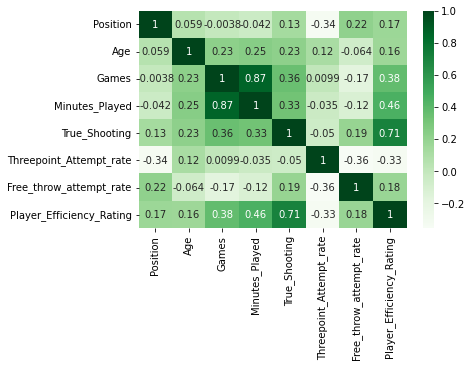

In [404]:
sns.heatmap(df_nba.corr(), annot=True, cmap= "Greens")

In [405]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [406]:
model.fit(X_train, Y_train)

LinearRegression()

In [407]:
Y_test

483     9.8
73      5.4
231    10.3
175    12.9
237    31.4
       ... 
247    21.9
383    11.7
19     11.2
321    13.0
331    14.6
Name: Player_Efficiency_Rating, Length: 100, dtype: float64

In [408]:
Y_pred = model.predict(X_test)

In [409]:
finaldf = pd.DataFrame({"Actual": Y_test, "Predicted":Y_pred})

In [410]:
finaldf

,Actual,Predicted
483,9.8,16.001452
73,5.4,7.194302
231,10.3,8.097460
175,12.9,15.473338
237,31.4,22.619364
...,...,...
247,21.9,19.854888
383,11.7,11.799601
19,11.2,8.395609
321,13.0,13.638565


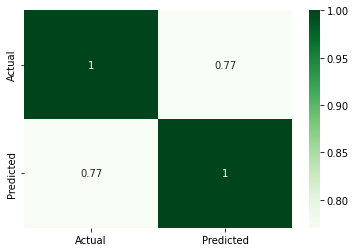

In [411]:
sns.heatmap(finaldf.corr(), annot=True, cmap= "Greens")

In [412]:
from sklearn.metrics import r2_score

In [413]:
r2_score(Y_test, Y_pred)

0.5812706469377107